In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import fastf1.legacy

import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.font_manager as fm

import pandas as pd

import seaborn as sns

In [2]:
ff1.Cache.enable_cache('Cache')

In [3]:
plotting.setup_mpl()

In [4]:
year = 2023
gp = 'Brazil'
event = 'R'

In [5]:
session = ff1.get_session(year, gp, event)

In [6]:
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info


api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\larsl\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool d

In [7]:
drivers = ['VER', 'NOR']

compare_drivers = session.laps[session.laps['Driver'].isin(drivers)]

compare_drivers

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:23.001000,1,NaT,1.0,0 days 00:16:38.183000,0 days 01:04:20.007000,NaT,0 days 00:01:00.960000,0 days 00:00:35.620000,NaT,...,SOFT,4.0,False,1,0 days 01:02:22.839000,Red Bull Racing,VER,24,False,2023-11-05 17:03:22.842
1,0 days 01:06:46.357000,1,0 days 00:02:23.356000,2.0,0 days 01:04:38.647000,0 days 01:06:43.349000,0 days 00:00:44.083000,0 days 00:01:03.234000,0 days 00:00:36.039000,0 days 01:05:07.084000,...,SOFT,5.0,False,2,0 days 01:04:23.001000,Red Bull Racing,VER,45,False,2023-11-05 17:05:23.004
2,0 days 01:32:11.479000,1,NaT,3.0,0 days 01:30:05.989000,NaT,NaT,0 days 00:00:49.786000,0 days 00:00:49.011000,NaT,...,SOFT,4.0,False,3,0 days 01:30:00.364000,Red Bull Racing,VER,1,False,2023-11-05 17:31:00.367
3,0 days 01:34:24.149000,1,0 days 00:02:12.670000,4.0,NaT,NaT,0 days 00:01:16.382000,0 days 00:00:38.838000,0 days 00:00:17.450000,0 days 01:33:27.861000,...,SOFT,5.0,False,3,0 days 01:32:11.479000,Red Bull Racing,VER,1,True,2023-11-05 17:33:11.482
4,0 days 01:35:39.894000,1,0 days 00:01:15.745000,5.0,NaT,NaT,0 days 00:00:19.651000,0 days 00:00:38.648000,0 days 00:00:17.446000,0 days 01:34:43.800000,...,SOFT,6.0,False,3,0 days 01:34:24.149000,Red Bull Racing,VER,1,True,2023-11-05 17:35:24.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0 days 02:54:25.309000,4,0 days 00:01:13.323000,67.0,NaT,NaT,0 days 00:00:18.993000,0 days 00:00:37.287000,0 days 00:00:17.043000,0 days 02:53:30.979000,...,SOFT,11.0,False,5,0 days 02:53:11.986000,McLaren,NOR,1,True,2023-11-05 18:54:11.989
138,0 days 02:55:38.895000,4,0 days 00:01:13.586000,68.0,NaT,NaT,0 days 00:00:18.946000,0 days 00:00:37.528000,0 days 00:00:17.112000,0 days 02:54:44.255000,...,SOFT,12.0,False,5,0 days 02:54:25.309000,McLaren,NOR,1,True,2023-11-05 18:55:25.312
139,0 days 02:56:52.582000,4,0 days 00:01:13.687000,69.0,NaT,NaT,0 days 00:00:18.922000,0 days 00:00:37.689000,0 days 00:00:17.076000,0 days 02:55:57.817000,...,SOFT,13.0,False,5,0 days 02:55:38.895000,McLaren,NOR,1,True,2023-11-05 18:56:38.898
140,0 days 02:58:06.044000,4,0 days 00:01:13.462000,70.0,NaT,NaT,0 days 00:00:18.979000,0 days 00:00:37.565000,0 days 00:00:16.918000,0 days 02:57:11.561000,...,SOFT,14.0,False,5,0 days 02:56:52.582000,McLaren,NOR,1,True,2023-11-05 18:57:52.585


In [8]:
fastest_lap_ver = session.laps.pick_driver('VER').pick_fastest()
fastest_lap_nor = session.laps.pick_driver('NOR').pick_fastest()

In [9]:
telemetry_ver = fastest_lap_ver.get_telemetry().add_distance()
telemetry_nor = fastest_lap_nor.get_telemetry().add_distance()

In [10]:
telemetry_ver['Driver'] = 'VER'
telemetry_nor['Driver'] = 'NOR'

telemetry_drivers = telemetry_ver.append(telemetry_nor)

telemetry_drivers

C:\Users\larsl\AppData\Local\Temp\ipykernel_6812\2008024706.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  telemetry_drivers = telemetry_ver.append(telemetry_nor)


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2023-11-05 18:55:17.019,0 days 02:54:17.016000,,NaN,0 days 00:00:00,10730,302,8,100,False,0,interpolation,0.000009,OnTrack,-3685,-5224,7766,0.000000,VER
3,2023-11-05 18:55:17.028,0 days 02:54:17.025000,,NaN,0 days 00:00:00.009000,10734,302,8,100,False,0,pos,0.000186,OnTrack,-3684,-5232,7767,0.755000,VER
4,2023-11-05 18:55:17.088,0 days 02:54:17.085000,,NaN,0 days 00:00:00.069000,10742,302,8,100,False,0,pos,0.001371,OnTrack,-3672,-5280,7768,5.788333,VER
5,2023-11-05 18:55:17.098,0 days 02:54:17.095000,,NaN,0 days 00:00:00.079000,10750,303,8,100,False,0,car,0.001569,OnTrack,-3669,-5287,7768,6.630000,VER
6,2023-11-05 18:55:17.298,0 days 02:54:17.295000,,NaN,0 days 00:00:00.279000,10783,304,8,100,False,0,car,0.005526,OnTrack,-3630,-5444,7772,23.518889,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2023-11-05 18:48:03.347,0 days 02:47:03.344000,1,608.783889,0 days 00:01:11.738000,10686,302,8,99,False,0,pos,0.982014,OnTrack,-3807,-4740,7753,4189.661944,NOR
542,2023-11-05 18:48:03.536,0 days 02:47:03.533000,1,605.478333,0 days 00:01:11.927000,10707,303,8,99,False,0,car,0.985746,OnTrack,-3762,-4920,7757,4205.569444,NOR
543,2023-11-05 18:48:03.728,0 days 02:47:03.725000,1,600.833889,0 days 00:01:12.119000,10704,303,8,99,False,0,pos,0.989545,OnTrack,-3731,-5045,7762,4221.729444,NOR
544,2023-11-05 18:48:03.976,0 days 02:47:03.973000,1,596.189444,0 days 00:01:12.367000,10702,304,8,99,False,0,car,0.994457,OnTrack,-3683,-5234,7767,4242.671667,NOR


In [11]:
num_minisectors = 7*3

total_distance = max(telemetry_drivers['Distance'])

minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [12]:
telemetry_drivers['Minisector'] = telemetry_drivers['Distance'].apply(lambda dist: (int((dist // minisector_length) + 1)))

In [13]:
average_speed = telemetry_drivers.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

average_speed

,Minisector,Driver,Speed
0,1,NOR,302.736842
1,1,VER,304.277778
2,2,NOR,167.142857
3,2,VER,169.971429
4,3,NOR,178.200000
5,3,VER,171.176471
6,4,NOR,250.210526
7,4,VER,256.187500
8,5,NOR,284.650000
9,5,VER,282.950000


In [14]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

fastest_driver

,Minisector,Fastest_driver
1,1,VER
3,2,VER
4,3,NOR
7,4,VER
8,5,NOR
10,6,NOR
12,7,NOR
14,8,NOR
16,9,NOR
18,10,NOR


In [15]:
telemetry_drivers = telemetry_drivers.merge(fastest_driver, on=['Minisector'])
telemetry_drivers = telemetry_drivers.sort_values(by=['Distance'])
telemetry_drivers.loc[telemetry_drivers['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry_drivers.loc[telemetry_drivers['Fastest_driver'] == 'NOR', 'Fastest_driver_int'] = 2

In [16]:
x = np.array(telemetry_drivers['X'].values)
y = np.array(telemetry_drivers['Y'].values)

In [17]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry_drivers['Fastest_driver_int'].to_numpy().astype(float)

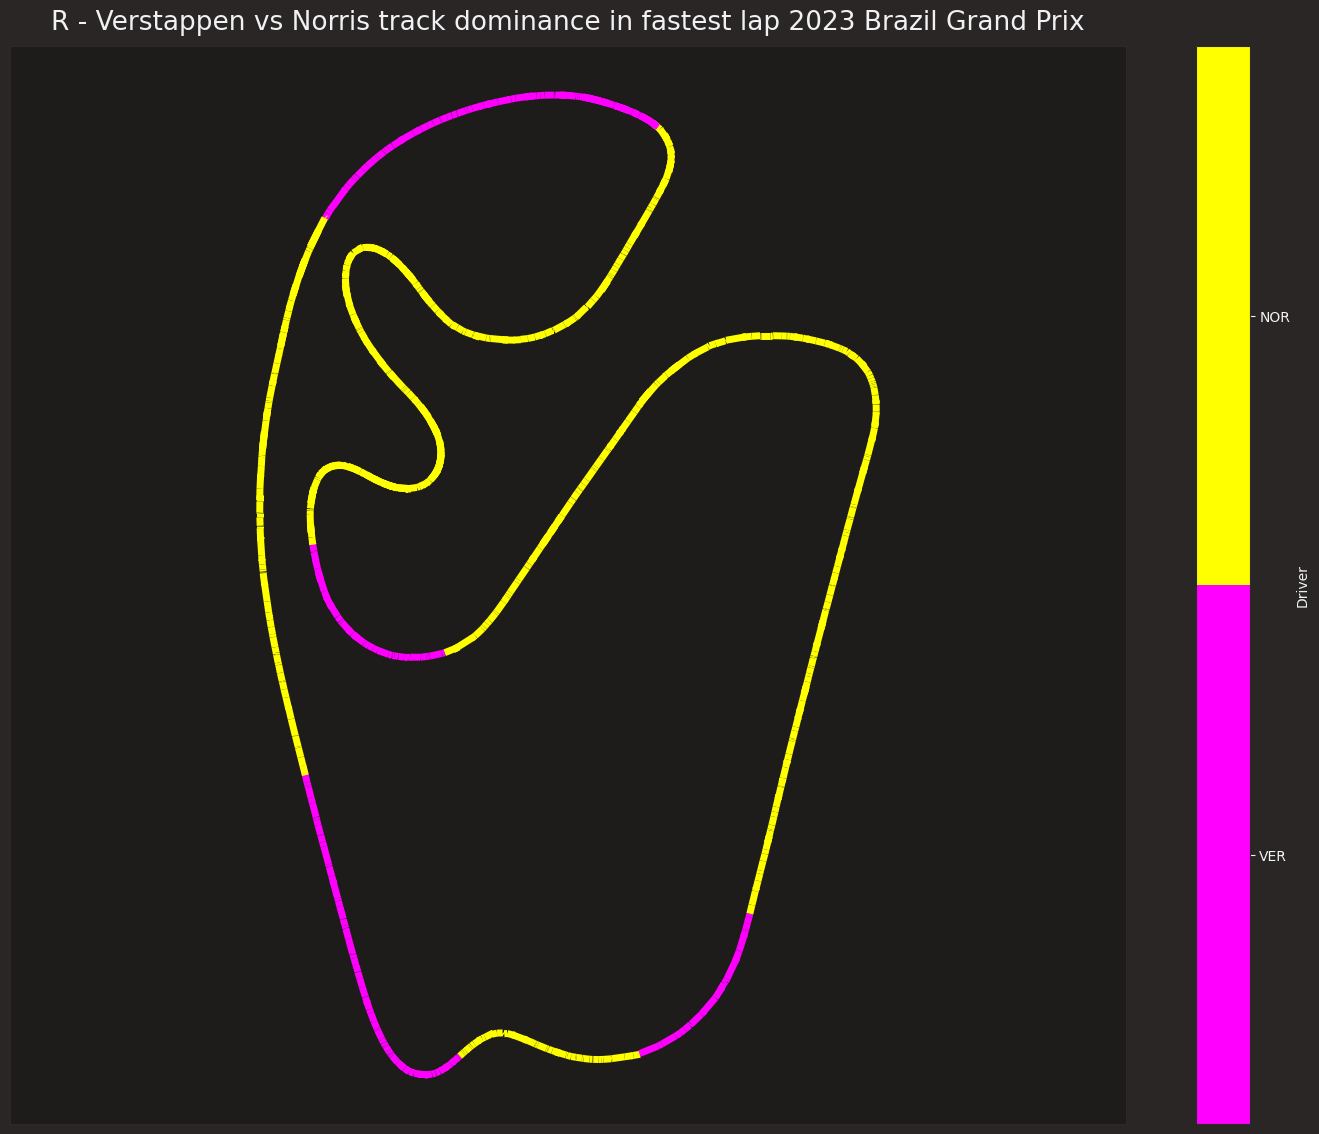

In [18]:
cmap = plt.get_cmap('spring',2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 14]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, label='Driver', boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 3.5))
cbar.set_ticklabels(['VER','NOR'])

title = f'{str(event)} - Verstappen vs Norris track dominance in fastest lap {str(year)} {str(gp)} Grand Prix'
plt.title(title)

plt.savefig(f'Figures/{title}.png')

plt.show()